In [1]:
import gaiaxpy as gxp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sdss

from astroML.sum_of_norms import sum_of_norms, norm
from astroquery.gaia import Gaia
from astroquery.sdss import SDSS as aq_sdss

In [2]:
df = pd.read_csv('../data/gaia_sdss_joined.csv')

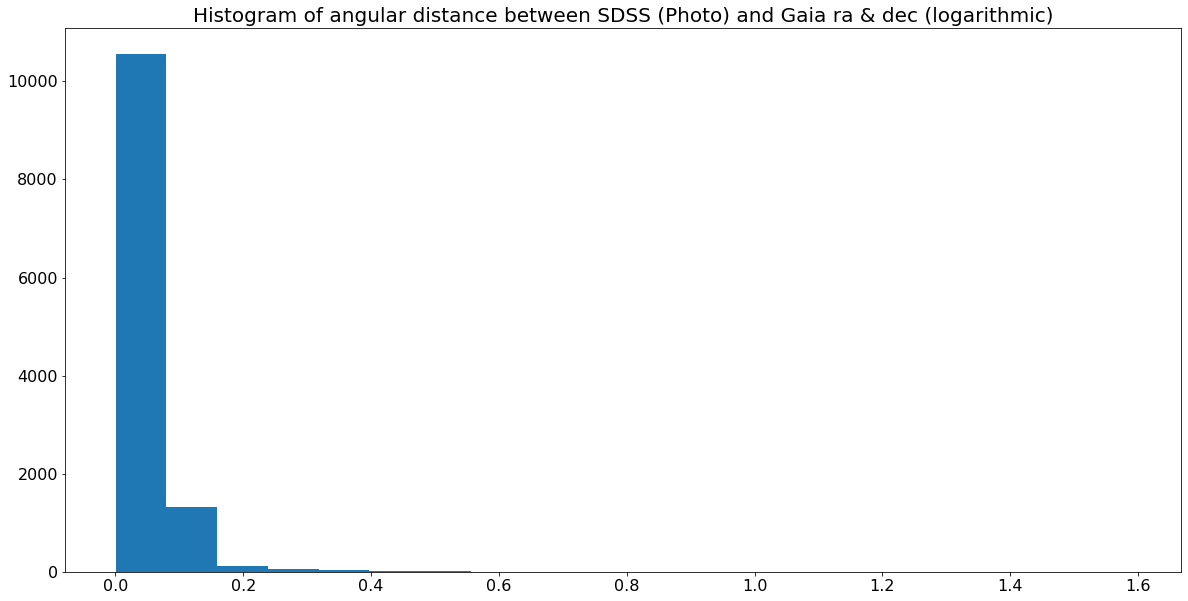

In [3]:
plt.figure(figsize=(20, 10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.title('Histogram of angular distance between SDSS (Photo) and Gaia ra & dec (logarithmic)', fontsize=20)
plt.hist(df['angular_distance'], bins=20)
None

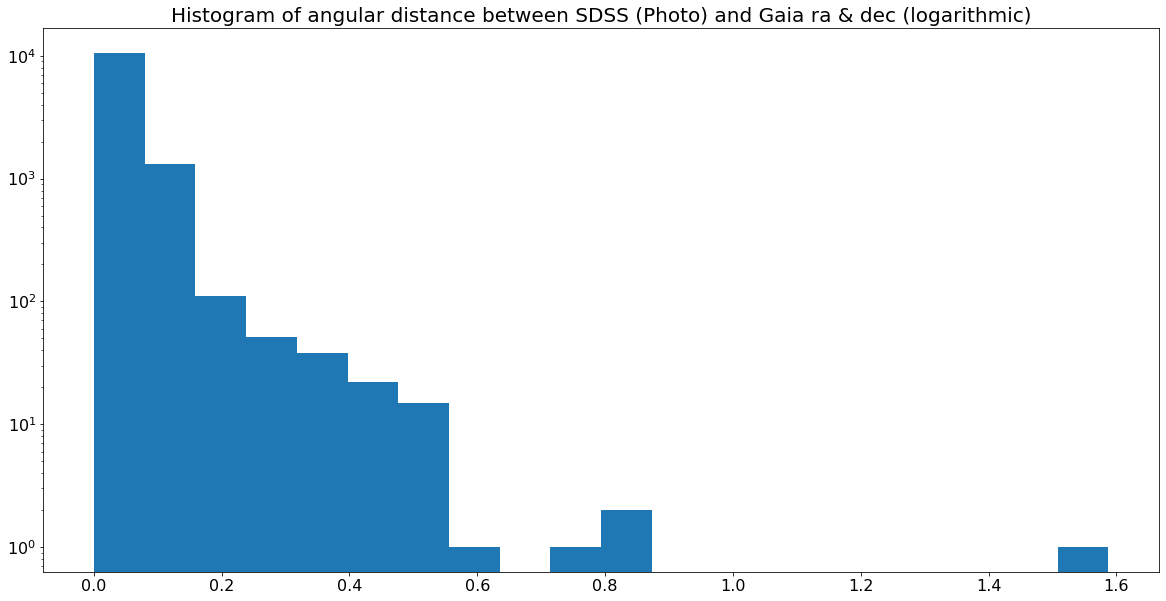

In [4]:
plt.figure(figsize=(20, 10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.title('Histogram of angular distance between SDSS (Photo) and Gaia ra & dec (logarithmic)', fontsize=20)
plt.hist(df['angular_distance'], bins=20)
plt.yscale('log')

In [27]:
ang_dist = 3600 * 2 * np.arcsin(np.sqrt(np.sin(np.deg2rad((df['photoDec'] - df['gaia_dec'])/2))**2 + np.cos(np.deg2rad(df['gaia_dec']))*np.cos(np.deg2rad(df['photoDec']))*np.sin(np.deg2rad((df['photoRa'] - df['gaia_ra'])/2))**2))

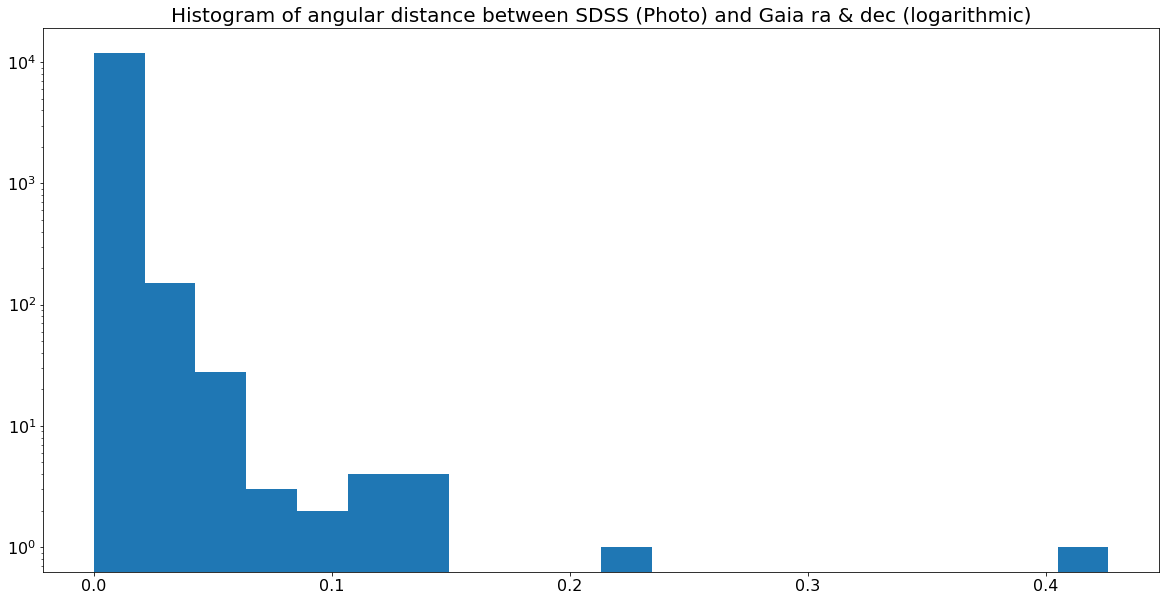

In [28]:
plt.figure(figsize=(20, 10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.title('Histogram of angular distance between SDSS (Photo) and Gaia ra & dec (logarithmic)', fontsize=20)
plt.hist(ang_dist, bins=20)
plt.yscale('log')

In [34]:
df.loc[df['angular_distance'] == max(df['angular_distance'])].transpose()

,208
source_id,3.833164e+18
clean_sdssdr13_oid,6.337763e+07
original_ext_source_id,1.237652e+18
angular_distance,1.587563e+00
gaia_ra,1.509668e+02
gaia_dec,-7.413967e-01
phot_g_mean_mag,1.630386e+01
bp_g,5.290050e-01
g_rp,7.429657e-01
objId,1.237652e+18


In [41]:
df_filt = df.loc[(df['psfMag_g'] - df['psfMag_i'] < 2) & (df['psfMag_g'] - df['psfMag_i'] > 0 )]
mag_diff = df_filt['phot_g_mean_mag'] - df_filt['psfMag_r']

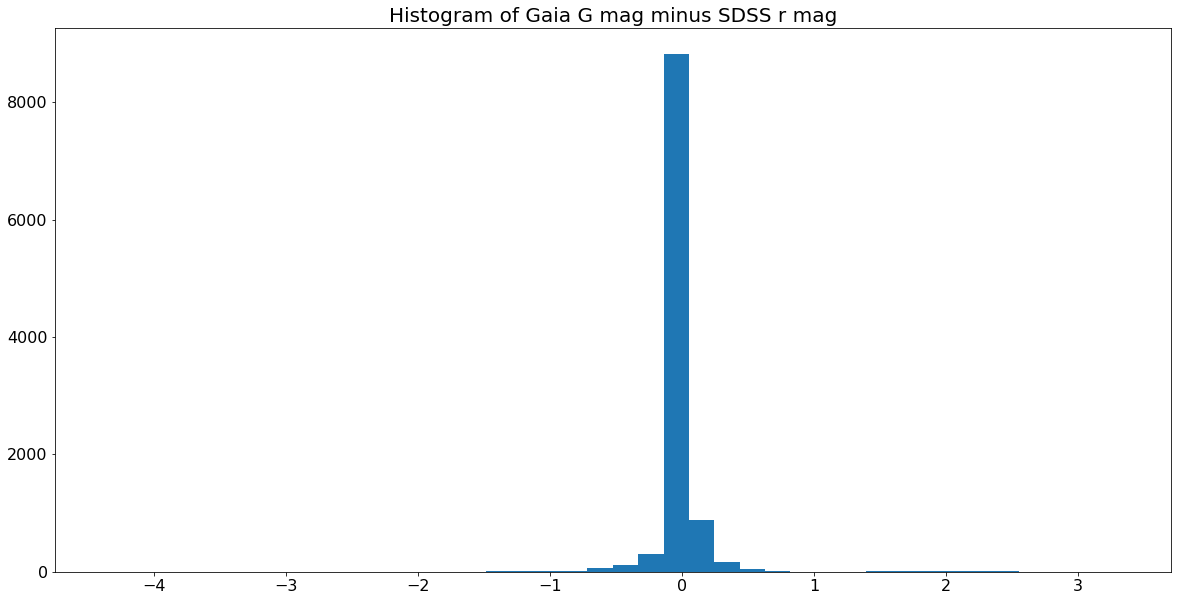

In [51]:
plt.figure(figsize=(20, 10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.title('Histogram of Gaia G mag minus SDSS r mag', fontsize=20)
plt.hist(mag_diff, bins=40)
None

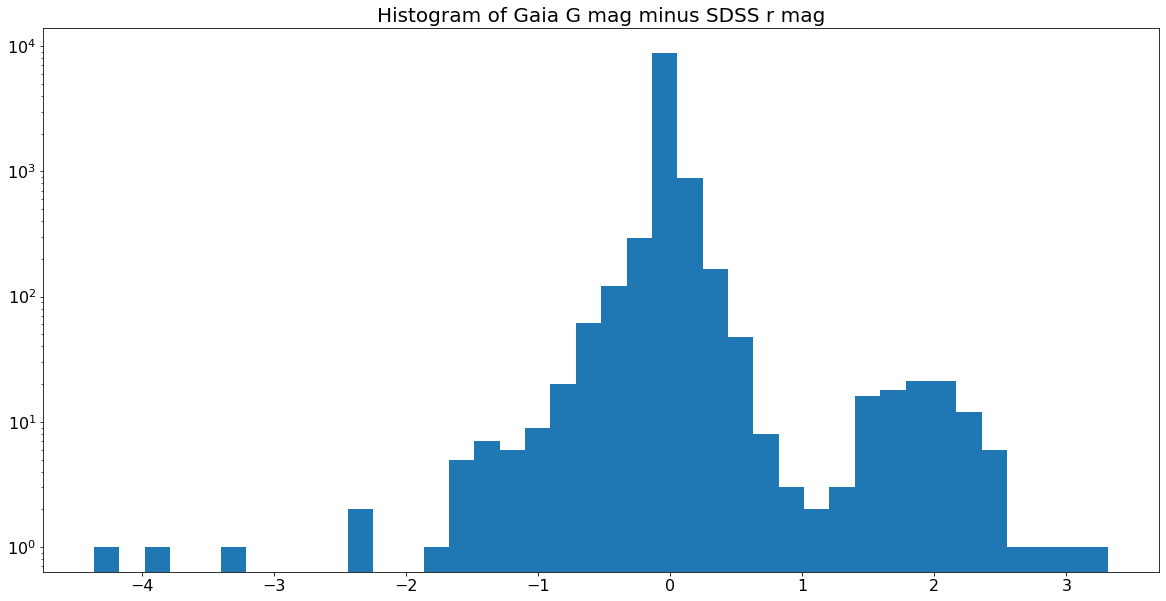

In [52]:
plt.figure(figsize=(20, 10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.title('Histogram of Gaia G mag minus SDSS r mag (logarithmic)', fontsize=20)
plt.hist(mag_diff, bins=40)
plt.yscale('log')